In [3]:
import pandas as pd

In [4]:
responses = pd.read_csv('/content/Form responses.csv')

In [5]:
responses

,Cases,Subject 1,Subject 2,Subject 3,Subject 4,Subject 5,Subject 6,Subject 7,Subject 8,Subject 9,...,Subject 16,Subject 17,Subject 18,Subject 19,Subject 20,Subject 21,Subject 22,Subject 23,Subject 24,True label
0,Case 1,Walking,Walking,Walking,Jogging,Walking,Walking,Walking,Walking,Walking,...,Walking,Walking,Walking,Stairs,Jogging,Walking,Walking,Walking,Walking,Walking
1,Case 2,Jogging,Jogging,Stairs,Stairs,Stairs,Stairs,Stairs,Stairs,Jogging,...,Walking,Walking,Jogging,Stairs,Walking,Stairs,Walking,Stairs,Stairs,Stairs
2,Case 3,Stairs,Walking,Stairs,Walking,Walking,Jogging,Jogging,Stairs,Stairs,...,Walking,Stairs,Stairs,Walking,Stairs,Jogging,Walking,Stairs,Stairs,Jogging
3,Case 4,Stairs,Jogging,Jogging,Walking,Jogging,Jogging,Jogging,Stairs,Jogging,...,Jogging,Stairs,Jogging,Jogging,Jogging,Jogging,Jogging,Jogging,Jogging,Jogging
4,Case 5,Walking,Stairs,Stairs,Stairs,Stairs,Stairs,Stairs,Walking,Walking,...,Stairs,Jogging,Stairs,Stairs,Jogging,Stairs,Stairs,Stairs,Walking,Stairs
5,Case 6,Stairs,Jogging,Walking,Walking,Jogging,Walking,Walking,Walking,Walking,...,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Jogging,Walking,Walking
6,Case 7,Jogging,Jogging,Jogging,Jogging,Jogging,Jogging,Jogging,Walking,Jogging,...,Stairs,Jogging,Walking,Jogging,Stairs,Jogging,Walking,Walking,Stairs,Jogging
7,Case 8,Walking,Walking,Walking,Walking,Stairs,Walking,Walking,Stairs,Stairs,...,Jogging,Stairs,Stairs,Walking,Stairs,Walking,Stairs,Stairs,Walking,Walking
8,Case 9,Stairs,Stairs,Stairs,Walking,Stairs,Stairs,Walking,Stairs,Walking,...,Walking,Stairs,Walking,Stairs,Jogging,Stairs,Stairs,Jogging,Stairs,Stairs
9,Case 10,Walking,Stairs,Stairs,Walking,Stairs,Walking,Stairs,Walking,Jogging,...,Walking,Stairs,Jogging,Jogging,Walking,Stairs,Walking,Walking,Stairs,Stairs


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
df = responses.copy()

# Convert string labels to numerical values
label_encoder = LabelEncoder()
for col in df.columns[1:-1]:  # Skip the 'subject' and 'true_label' columns
    df[col] = label_encoder.fit_transform(df[col])

In [7]:
# Encode the true labels
df['True label'] = label_encoder.fit_transform(df['True label'])

In [8]:
df

,Cases,Subject 1,Subject 2,Subject 3,Subject 4,Subject 5,Subject 6,Subject 7,Subject 8,Subject 9,...,Subject 16,Subject 17,Subject 18,Subject 19,Subject 20,Subject 21,Subject 22,Subject 23,Subject 24,True label
0,Case 1,2,2,2,0,2,2,2,2,2,...,2,2,2,1,0,2,2,2,2,2
1,Case 2,0,0,1,1,1,1,1,1,0,...,2,2,0,1,2,1,2,1,1,1
2,Case 3,1,2,1,2,2,0,0,1,1,...,2,1,1,2,1,0,2,1,1,0
3,Case 4,1,0,0,2,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,Case 5,2,1,1,1,1,1,1,2,2,...,1,0,1,1,0,1,1,1,2,1
5,Case 6,1,0,2,2,0,2,2,2,2,...,2,2,2,2,2,2,2,0,2,2
6,Case 7,0,0,0,0,0,0,0,2,0,...,1,0,2,0,1,0,2,2,1,0
7,Case 8,2,2,2,2,1,2,2,1,1,...,0,1,1,2,1,2,1,1,2,2
8,Case 9,1,1,1,2,1,1,2,1,2,...,2,1,2,1,0,1,1,0,1,1
9,Case 10,2,1,1,2,1,2,1,2,0,...,2,1,0,0,2,1,2,2,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Cases       15 non-null     object
 1   Subject 1   15 non-null     int64 
 2   Subject 2   15 non-null     int64 
 3   Subject 3   15 non-null     int64 
 4   Subject 4   15 non-null     int64 
 5   Subject 5   15 non-null     int64 
 6   Subject 6   15 non-null     int64 
 7   Subject 7   15 non-null     int64 
 8   Subject 8   15 non-null     int64 
 9   Subject 9   15 non-null     int64 
 10  Subject 10  15 non-null     int64 
 11  Subject 11  15 non-null     int64 
 12  Subject 12  15 non-null     int64 
 13  Subject 13  15 non-null     int64 
 14  Subject 14  15 non-null     int64 
 15  Subject 15  15 non-null     int64 
 16  Subject 16  15 non-null     int64 
 17  Subject 17  15 non-null     int64 
 18  Subject 18  15 non-null     int64 
 19  Subject 19  15 non-null     int64 
 20  Subject 20  

In [10]:
len(df)

15

In [11]:
df.columns[1:25]

Index(['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5',
       'Subject 6', 'Subject 7', 'Subject 8', 'Subject 9', 'Subject 10',
       'Subject 11', 'Subject 12', 'Subject 13', 'Subject 14', 'Subject 15',
       'Subject 16', 'Subject 17', 'Subject 18', 'Subject 19', 'Subject 20',
       'Subject 21', 'Subject 22', 'Subject 23', 'Subject 24'],
      dtype='object')

In [12]:
for subject in range(len(df)):
    subject_predictions = df.iloc[subject-1, 1:-1].astype(int)  # Get predictions for the subject and convert to integers
    true_labels = df.loc[subject, 'True label']

In [13]:
true_labels

2

In [14]:
# Initialize a dictionary to store the metrics for each subject
metrics = {}

subject_columns = df.columns[1:25]

# Loop through each subject and calculate their metrics
for subject in subject_columns:
    subject_predictions = df[subject].astype(int)  # Get predictions for the subject and convert to integers
    true_labels = df['True label']  # Get true labels
    cm = confusion_matrix(true_labels, subject_predictions, labels=[0, 1, 2])
    accuracy = accuracy_score(true_labels, subject_predictions)
    report = classification_report(true_labels, subject_predictions, labels=[0, 1, 2], target_names=label_encoder.classes_, output_dict=True)

    metrics[f'Subject_{subject}'] = {
        'confusion_matrix': cm,
        'accuracy': accuracy,
        'classification_report': report
    }

In [15]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, subject):
    plt.figure(figsize=(4, 3))

    # Set font sizes
    sns.set(font_scale=1.4)  # for label size
    plt.rc('font', size=12)  # for axes label size
    plt.rc('axes', titlesize=14)  # for axes title size
    plt.rc('axes', labelsize=12)  # for x and y labels
    plt.rc('xtick', labelsize=12)  # for x tick labels
    plt.rc('ytick', labelsize=12)  # for y tick labels
    plt.rc('legend', fontsize=12)  # for legend font size

    sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {subject}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [16]:
# # Plot confusion matrix and print classification report for each subject
# for subject in range(1, 16):
#     print(f"Subject {subject}:")
#     print(f"Accuracy: {metrics[f'Subject_{subject}']['accuracy']:.2f}")
#     print("Classification Report:")
#     print(pd.DataFrame(metrics[f'Subject_{subject}']['classification_report']).transpose())
#     plot_confusion_matrix(metrics[f'Subject_{subject}']['confusion_matrix'], subject)

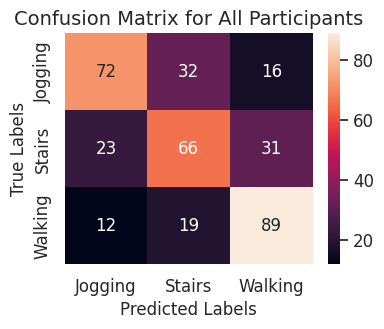

In [17]:
all_predictions = df.iloc[:, 1:-1].astype(int).values.flatten()
true_labels = np.repeat(df['True label'], 24).values.flatten()
cm = confusion_matrix(true_labels, all_predictions)
plot_confusion_matrix(cm, 'All Participants')

In [18]:
all_predictions = df.iloc[:, 1:-1].astype(int).values.flatten()
true_labels = np.repeat(df['True label'], 24).values.flatten()

accuracy = accuracy_score(true_labels, all_predictions)
report = classification_report(true_labels, all_predictions, labels=[0, 1, 2], target_names=label_encoder.classes_, output_dict=True)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(pd.DataFrame(report).transpose())

Accuracy: 0.63
Classification Report:
              precision    recall  f1-score     support
Jogging        0.672897  0.600000  0.634361  120.000000
Stairs         0.564103  0.550000  0.556962  120.000000
Walking        0.654412  0.741667  0.695312  120.000000
accuracy       0.630556  0.630556  0.630556    0.630556
macro avg      0.630471  0.630556  0.628879  360.000000
weighted avg   0.630471  0.630556  0.628879  360.000000


In [19]:
def plot_classification_report(report, title='Classification Report'):
    plt.figure(figsize=(4, 3))

    # Convert the classification report to a DataFrame
    report_df = pd.DataFrame(report).T
    report_df = report_df.drop(['macro avg', 'weighted avg'])
    report_df = report_df.drop(columns=['support'])

    row_to_move = report_df.loc['accuracy']
    report_df = report_df.drop('accuracy')
    report_df['accuracy'] = row_to_move.values

    # Set font sizes
    sns.set(font_scale=1.4)  # for label size
    plt.rc('font', size=12)  # for axes label size
    plt.rc('axes', titlesize=14)  # for axes title size
    plt.rc('axes', labelsize=12)  # for x and y labels
    plt.rc('xtick', labelsize=12)  # for x tick labels
    plt.rc('ytick', labelsize=12)  # for y tick labels
    plt.rc('legend', fontsize=12)  # for legend font size

    # Use seaborn heatmap to display the report
    sns.heatmap(report_df.T, annot=True, fmt=".2f", cmap="Blues", cbar=True)

    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Metrics')
    plt.show()

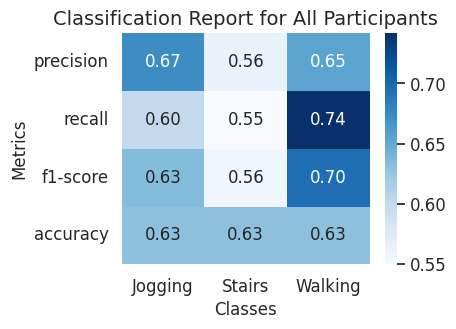

In [20]:
all_predictions = df.iloc[:, 1:-1].astype(int).values.flatten()
true_labels = np.repeat(df['True label'], 24).values.flatten()

report = classification_report(true_labels, all_predictions, target_names=label_encoder.classes_, output_dict=True)

plot_classification_report(report, title='Classification Report for All Participants')